- 비지도 학습
    - 정답이 없는 데이터에서 패턴을 발견
    - 데이터에 대한 사전지식이 부족할때 유용
    - 대표적인 알고리즘
        - 군집(클러스터링)
            - 고객을 세분화
            - 문서 분류
            - 이미지 분류

데이터 가져오기

In [69]:
import numpy as np
import matplotlib.pylab as plt

In [70]:
fr = np.load('fruits_300.npy')
fr.shape

(300, 100, 100)

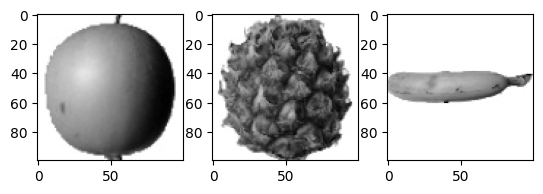

In [71]:
fr[0].shape  # 첫번재 이미지
plt.subplot(1,3,1)
plt.imshow(fr[0],cmap='gray_r')
plt.subplot(1,3,2)
plt.imshow(fr[100],cmap='gray_r')
plt.subplot(1,3,3)
plt.imshow(fr[200],cmap='gray_r')
plt.show()

In [72]:
# 차원변경하기
test = np.array([
    [
        [1,2],
        [3,4]
    ]
    ,[
        [10,20],
        [30,40]
    ]
    ,[
        [100,200],
        [300,400]
    ]
])
test.reshape(3,2*2)

array([[  1,   2,   3,   4],
       [ 10,  20,  30,  40],
       [100, 200, 300, 400]])

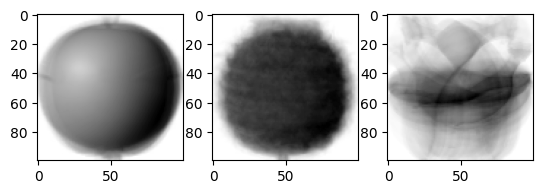

In [73]:
# fr.reshape(300,100*100)
fr2 = fr.reshape(300,-1)
apple = fr2[:100]  # 100
pineApple = fr2[100:200]  # 100
banana = fr2[200:] # 100
# 각 픽셀의 평균 값 즉 평균이미지
apple_mean = apple.mean(axis=0)
pineApple_mean = pineApple.mean(axis=0)
banana_mean = banana.mean(axis=0)

plt.subplot(1,3,1)
plt.imshow(apple_mean.reshape(100,100),cmap='gray_r')

plt.subplot(1,3,2)
plt.imshow(pineApple_mean.reshape(100,100),cmap='gray_r')

plt.subplot(1,3,3)
plt.imshow(banana_mean.reshape(100,100),cmap='gray_r')

In [91]:

# 전체데이터의 이미지별 데이터를 펼쳐서 (300,10000)
# 각 이미지의 평균이미지
# 전체 이미지에서 - 평균이미지를 뺀 값을 100개씩 그려본다.(왜냐면 샘플이 100개씩 존재)

# 각 그룹에대한 오차를 계산
diff_apple =  np.abs(fr2 - apple_mean)
diff_pineApple =  np.abs(fr2 - pineApple_mean)
diff_banana =  np.abs(fr2 - banana_mean)
diff_apple

array([[0.01, 0.01, 0.01, ..., 0.  , 0.  , 0.  ],
       [0.01, 0.01, 0.01, ..., 0.  , 0.  , 0.  ],
       [0.01, 0.01, 0.01, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.01, 0.01, 0.01, ..., 0.  , 0.  , 0.  ],
       [0.01, 0.01, 0.01, ..., 0.  , 0.  , 0.  ],
       [0.01, 0.01, 0.01, ..., 0.  , 0.  , 0.  ]])

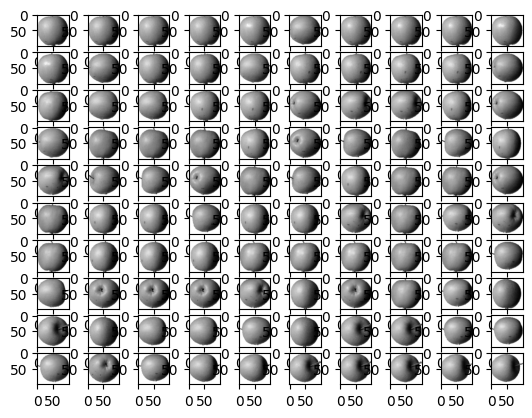

In [99]:
img_idx = np.argsort(diff_apple.mean(axis=1))
for idx,img_index in enumerate(img_idx[:100]):
    plt.subplot(10,10,idx+1)
    plt.imshow(fr[img_index],cmap='gray_r')

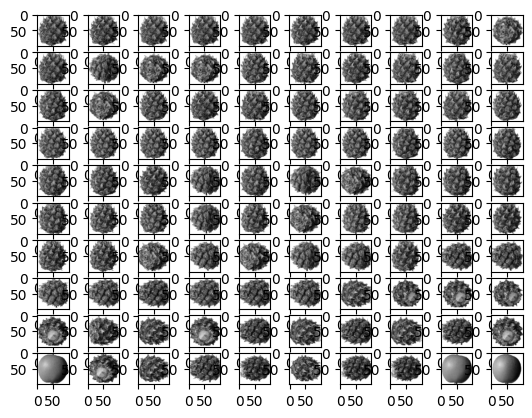

In [100]:
img_idx = np.argsort(diff_pineApple.mean(axis=1))
for idx,img_index in enumerate(img_idx[:100]):
    plt.subplot(10,10,idx+1)
    plt.imshow(fr[img_index],cmap='gray_r')

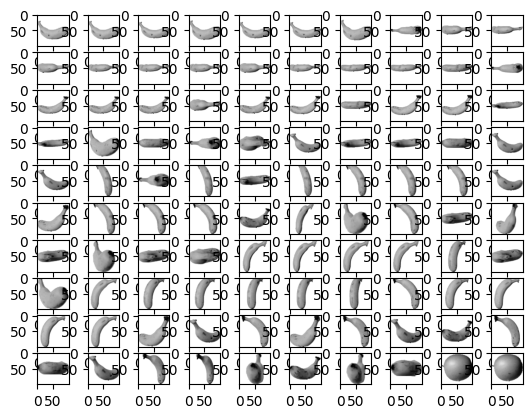

In [101]:
img_idx = np.argsort(diff_banana.mean(axis=1))
for idx,img_index in enumerate(img_idx[:100]):
    plt.subplot(10,10,idx+1)
    plt.imshow(fr[img_index],cmap='gray_r')

- k 평균
    - 군집의 수 k 를 설정
    - 랜덤하게 k개의 중심을 선택
    - k개에서 가장 가까운 데이터(이미지)들의 평균을 구해서 새로운 중심점으로 이동
    - 이 과정을 거치면 k의 포인터 주변에(이웃) 동일한또는 비슷한 속성을 가지는 군집의 중심점으로 이동 완료

In [109]:
fr = np.load('fruits_300.npy')
fr.shape

(300, 100, 100)

In [110]:
fr2 = fr.reshape(300,-1)
fr2.shape

(300, 10000)

In [137]:
# 사이킷런은 2차원 데이터를 요구
# 원본데이터는 300,100,100 --> 300,10000
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fr2)
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))


In [141]:
label_0 = np.where(km.labels_ == 0)[0]
label_1 = np.where(km.labels_ == 1)[0]
label_2 = np.where(km.labels_ == 2)[0]

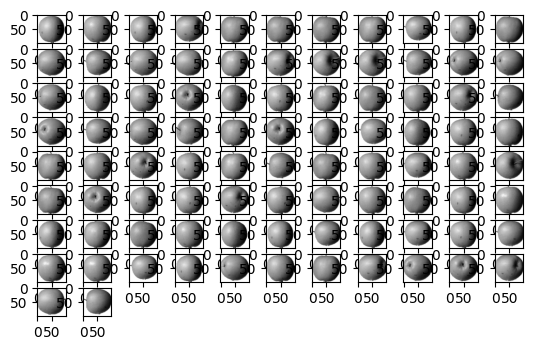

In [148]:
for i, idx in enumerate(label_2):
    plt.subplot(11,11,i+1)
    plt.imshow(fr[idx],cmap='gray_r')

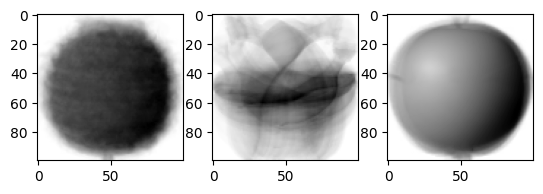

In [163]:
# 이미지에 대한 클러스터 군집의 평균 즉. 각 픽셀의 평균.. 그래서 평균 이미지 모양을 하고 있음
km.cluster_centers_[0].reshape(-1,100,100).shape
for i,img in enumerate(km.cluster_centers_):
    plt.subplot(1,3,i+1)
    plt.imshow(img.reshape(100,100),cmap='gray_r' )

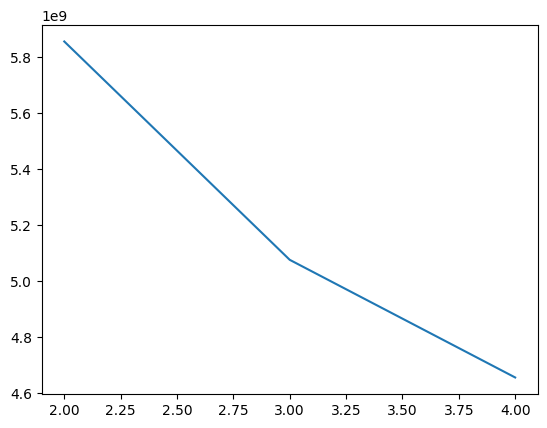

In [167]:
# 최적의 k 개수 - 엘보우 기법
# 군집의 수에 따른 inertia, SSE 값을 계산해서 급격한 변화가 일어나는 지점이 최적
#SSE 각 셈플하고 군집간의 거리의 제곱의 합, nertia 군집의 응집도.. 둘다 비슷하 개념
result = []
for k in range(2,5):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fr2)
    result.append(km.inertia_)

plt.plot(range(2,5), result)


In [169]:
fr2.shape

(300, 10000)

In [ ]:
# PCA로 2차원으로 축소해서 군집별로  시각화
